<font size="+3" color=blue><b> <center><u> Analysis Of Rapes in India </u></center></b></font>

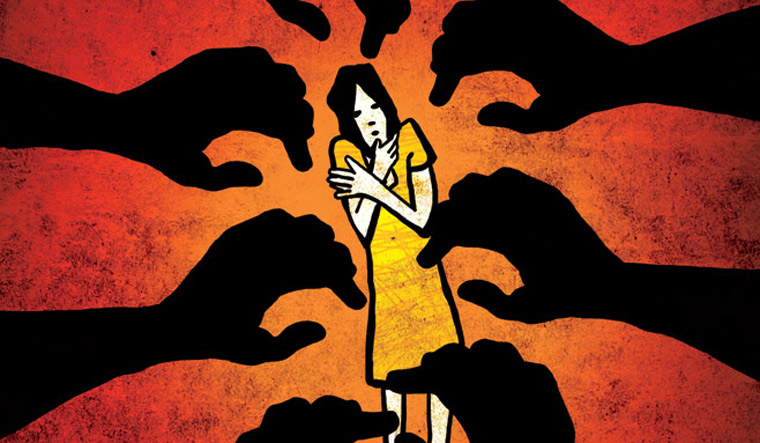

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center> Table of content </center></h2>

* [Data Exploration ](#1)
* [State with Most Number Of Rapes (2016 - 2018)](#2)
* [State with Most Number Of Rapes from 2016 to 2018](#8)
* [TOP 10 States with Most Number Of Rapes (2016 - 2018)](#9)
* [TOP 10 States with Least Number Of Rapes (2016 - 2018)](#10)
* [Number Of Rapes Reported Per Year (2016 - 2018)](#3)
* [Distribution of age groups of victims (2016 - 2018)](#4)
* [StateWise Distribution of age groups of victims](#5)

<a id="1"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center>  Load and Check Data  </center></h2>

<a id="2.1"></a>
<font color="blue" size=+2.5><b> Import Libraries </b></font>


In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image
!python3.7 -m pip install --upgrade pip
!pip install pywaffle
from pywaffle import Waffle 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

import cufflinks as cf 

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

import random


In [ ]:
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

<a id="2.2"></a>
<font color="blue" size=+2.5><b> Import Dataset </b></font>


In [ ]:
rape16 = pd.read_csv("/kaggle/input/crime-in-india/Victims of Rape/2016 Victims of Rape.csv")
rape17 = pd.read_csv("/kaggle/input/crime-in-india/Victims of Rape/2017 Victims of Rape.csv")
rape18 = pd.read_csv("/kaggle/input/crime-in-india/Victims of Rape/2018 Victims of Rape.csv")

In [ ]:
rape18.rename(columns =dict(zip(rape18.columns.tolist(), rape16.columns.tolist()))  , inplace = True)

In [ ]:
first_add = rape16.add(rape17, fill_value="index")
second_add = first_add.add(rape18, fill_value="index")

In [ ]:
final_df = second_add.iloc[:,3:]
final_df["State/UT"] = rape16["State/UT"]

In [ ]:
rape16.head()

In [ ]:
rape17.head()

In [ ]:
rape18.head()

In [ ]:
rape16.columns


In [ ]:
rape17.columns


In [ ]:
rape18.columns


In [ ]:
rape16.shape


In [ ]:
rape17.shape


In [ ]:
rape18.shape


In [ ]:
rape16.dtypes.to_frame()

In [ ]:
rape17.dtypes.to_frame()

In [ ]:
rape18.dtypes.to_frame()

In [ ]:
rape16.describe()

In [ ]:
rape17.describe()

In [ ]:
rape18.describe()

<a id="2"></a>
<font color="blue" size=+2.5><b> State with Most Number Of Rapes (2016 - 2018) </b></font>


In [ ]:
states = rape16["State/UT"].values
casesin16 = rape16["Cases Reported"].values
casesin17 = rape17["Cases Reported"].values
casesin18 = rape18["Cases Reported"].values
total_cases = casesin16 + casesin17 + casesin18

data = [go.Bar(
    x = states,
    y = total_cases,
    marker = dict(color = 'blue',line=dict(color='#000000', width=1.5))
)]

layout = go.Layout(
   {
      "title":"State with Most Number Of Rapes (2016 - 2018)",
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

<a id="9"></a>
<font color="blue" size=+2.5><b> TOP 10 States with Most Number Of Rapes (2016 - 2018) </b></font>

In [ ]:
states = rape16["State/UT"].values
casesin16 = rape16["Cases Reported"].values
casesin17 = rape17["Cases Reported"].values
casesin18 = rape18["Cases Reported"].values
total_cases = casesin16 + casesin17 + casesin18
data = pd.DataFrame({'states': states, 'total_cases': total_cases}, columns=['states', 'total_cases'])
data = [go.Bar(
    x = data.sort_values(by='total_cases',ascending = False)[:10].states.values,
    y = data.sort_values(by='total_cases',ascending = False)[:10].total_cases.values,
    marker = dict(color = 'blue',line=dict(color='#000000', width=1.5))
)]

layout = go.Layout(
   {
      "title":"TOP 10 States with Most Number Of Rapes (2016 - 2018)",
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

<a id="10"></a>
<font color="blue" size=+2.5><b> TOP 10 States with Least Number Of Rapes (2016 - 2018) </b></font>

In [ ]:
states = rape16["State/UT"].values
casesin16 = rape16["Cases Reported"].values
casesin17 = rape17["Cases Reported"].values
casesin18 = rape18["Cases Reported"].values
total_cases = casesin16 + casesin17 + casesin18
data = pd.DataFrame({'states': states, 'total_cases': total_cases}, columns=['states', 'total_cases'])
data = [go.Bar(
    x = data.sort_values(by='total_cases',ascending = True)[:10].states.values,
    y = data.sort_values(by='total_cases',ascending = True)[:10].total_cases.values,
    marker = dict(color = 'blue',line=dict(color='#000000', width=1.5))
)]

layout = go.Layout(
   {
      "title":"TOP 10 States with Least Number Of Rapes (2016 - 2018)",
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

<a id="8"></a>
<font color="blue" size=+2.5><b> State with Most Number Of Rapes from 2016 to 2018 </b></font>


In [ ]:
trace1 = go.Bar(x=states, y=casesin16,name="2016")
trace2 = go.Bar(x=states, y=casesin17,name="2017")
trace3 = go.Bar(x=states, y=casesin18,name="2018")

# Fill out  data with our traces
data = [trace1, trace2,trace3]
# Create layout and specify title, legend and so on

layout = go.Layout(title="State with Most Number Of Rapes (2016, 2017, 2018)",
                   xaxis=dict(title="States"),
                   yaxis=dict(title="Number of Cases Reported"),
                   legend=dict(x=1.0, y=0.5)
                   ,barmode="group")


# Create figure with all prepared data for plot
fig = go.Figure(data=data, layout=layout)
# Create a plot in your Python script directory with name "bar-chart.html"
iplot(fig)

In [ ]:
fig = px.pie(values=total_cases,names=states,title='State with Most Number Of Rapes (2016 - 2018)',
             color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [ ]:
df = final_df[["State/UT","Cases Reported"]]

df.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True) 

shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(df.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Rape-Cases Reported (2016-2018)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases Reported', cmap='Blues', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)




<a id="3"></a>
<font color="blue" size=+2.5><b> Number Of Rapes Reported Per Year </b></font>


In [ ]:
casesin16 = rape16["Cases Reported"].values
casesin17 = rape17["Cases Reported"].values
casesin18 = rape18["Cases Reported"].values
total_cases = casesin16 + casesin17 + casesin18
data = [go.Bar(
    x = ["2016","2017","2018"],
    y = [casesin16.sum(),casesin17.sum(),casesin18.sum()],
    marker = dict(color = 'blue',line=dict(color='#000000', width=1.5))
)]

layout = go.Layout(
   {
      "title":"Number Of Rapes Reported Per Year",
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

<a id="4"></a>
<font color="blue" size=+2.5><b> Distribution of age groups of victims </b></font>

In [ ]:
tag = final_df.columns.tolist()[1:-3]
tag.pop(4)
value = [final_df[i].sum() for i in final_df.columns.tolist()[1:-3]]
value.pop(4)
fig = px.pie(values=value,names=tag,
             color_discrete_sequence=px.colors.qualitative.G10)
fig.show()
    

<a id="5"></a>
<font color="blue" size=+2.5><b> StateWise Distribution of age groups of victims </b></font>

In [ ]:
for i in tag:
    df = final_df[["State/UT",i]]
    df.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True) 
    shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
    merged = shp_gdf.set_index('st_nm').join(df.set_index('State/UT'))
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.axis('off')
    ax.set_title('State-wise Rape-Cases Reported (2016-2018) For '+ str(i),
             fontdict={'fontsize': '15', 'fontweight' : '3'})
    fig = merged.plot(column=i, cmap='Blues', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
    df.sort_values(by=[i], inplace=True,ascending=False)
    
    fig = px.pie(values=df[i].values,names=df['State/UT'],
             color_discrete_sequence=px.colors.qualitative.G10)
    fig.show()
    
    fig = px.bar(df,x='State/UT',y=i,color_discrete_sequence=['Blue'])
    fig.show()